In [1]:
import keras
from keras import layers

## Simple Autoencoders

In [2]:
bottleNeck_dim = 64
initial_shape = 784
input_img = keras.Input(shape=(initial_shape, ))

# encoding layer
enc_l = layers.Dense(bottleNeck_dim, activation='relu')(input_img)

#decode layer
dec_l = layers.Dense(initial_shape, activation='sigmoid')(enc_l)

# autoencoder 
autoencoder = keras.Model(input_img, dec_l)

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.dtype

dtype('float64')

In [6]:
print(x_train.shape)
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))

(60000, 28, 28)


In [7]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
print(x_test.shape)

(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train, epochs=50, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1364 - val_loss: 0.0906
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - val_loss: 0.0781
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - val_loss: 0.0752
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - val_loss: 0.0745
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - val_loss: 0.0739
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - val_loss: 0.0736
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - val_loss: 0.0734
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - val_loss: 0.0733
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - val_loss: 0.0732
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.073

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


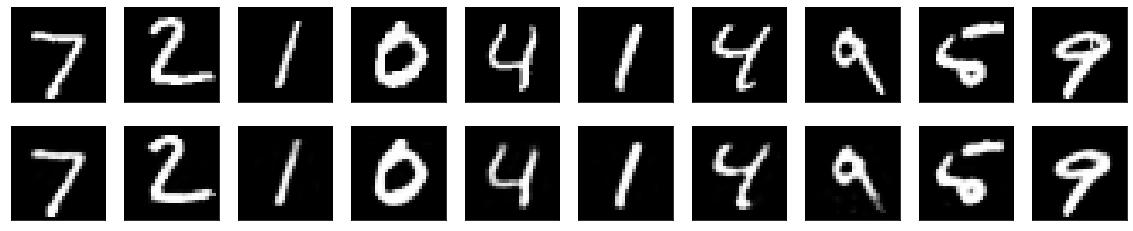

In [11]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## **Deep autoencoder**

In [44]:
latent_dim = 9250
input_l = keras.Input(shape=(784, ))
encoding_l1 = layers.Dense(392, activation='relu')(input_l)
encoding_l2 = layers.Dense(196, activation='relu')(encoding_l1)
encoding_l3 = layers.Dense(98, activation='relu')(encoding_l2)

bottle_neck = layers.Dense(latent_dim, activation='relu')(encoding_l3)

# decoding
decoding_l1 = layers.Dense(98, activation='relu')(bottle_neck)
decoding_l2 = layers.Dense(1960, activation='relu')(decoding_l1)
decoding_l3 = layers.Dense(3920, activation='relu')(decoding_l2)
output_layer = layers.Dense(784, activation='sigmoid')(decoding_l3)

autoencoder = keras.Model(input_l, output_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2163 - val_loss: 0.1456
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1300 - val_loss: 0.1191
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1125 - val_loss: 0.1050
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1021 - val_loss: 0.0976
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0954 - val_loss: 0.0931
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0911 - val_loss: 0.0904
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0880 - val_loss: 0.0885
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0857 - val_loss: 0.0863
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0839 - val_loss: 0.0857
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0826 - val_lo

In [46]:
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


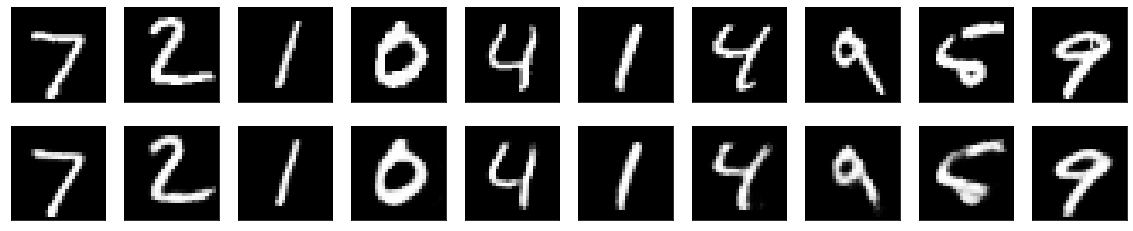

In [47]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    #  oriinal
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

***Encoding is done via maxPooling layers to decrease size and UpSampling is used as decoder to increase size of image***

In [59]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [60]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [58]:
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 8)           584

In [62]:

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1120 - val_loss: 0.1098
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1092 - val_loss: 0.1074
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1071 - val_loss: 0.1050
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1042 - val_loss: 0.1023
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1030 - val_loss: 0.1015
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1020 - val_loss: 0.1004
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1012 - val_loss: 0.0996
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1004 - val_loss: 0.0990
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0997 - val_loss: 0.0982

In [63]:
images = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 3ms/step


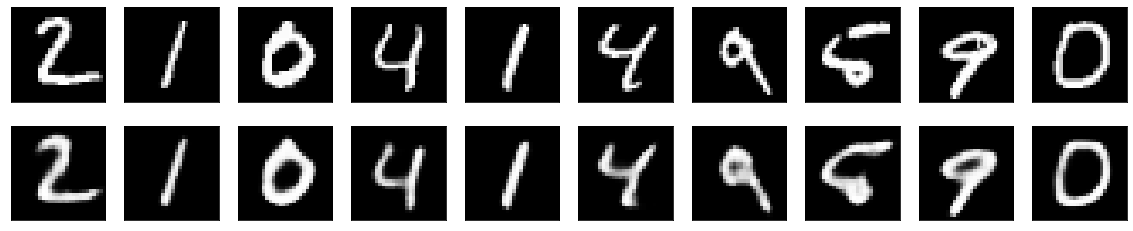

In [64]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 3ms/step


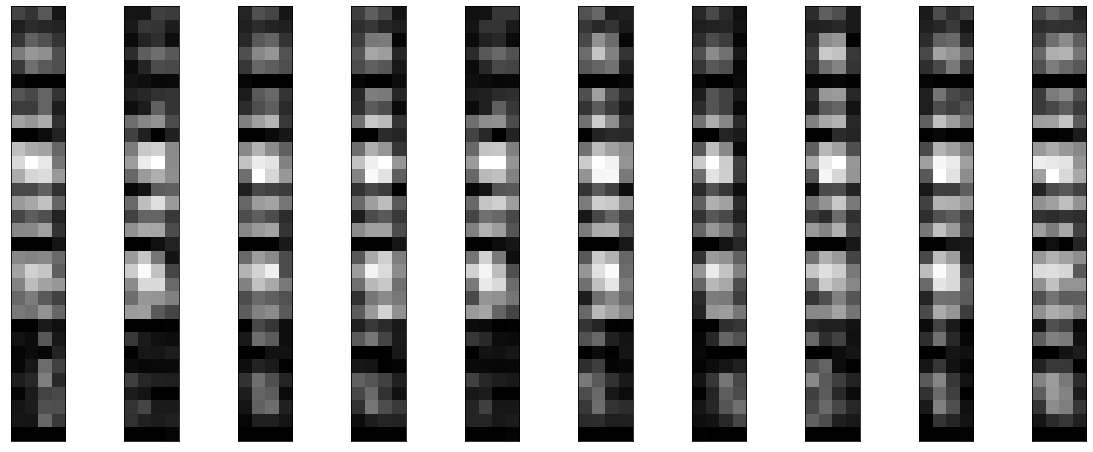

In [65]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()